In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KSU test/HeartAttack.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

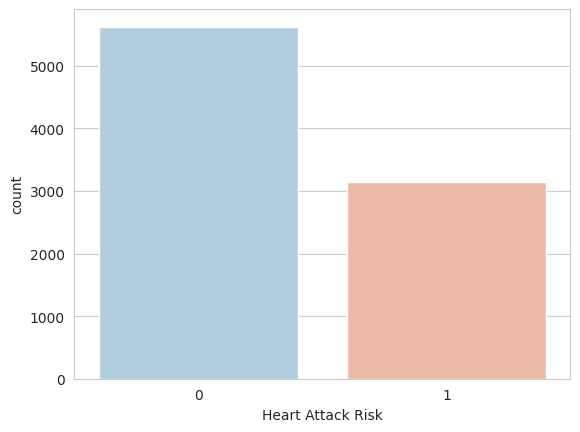

In [6]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk',data=df,palette='RdBu_r')

In [7]:
#categorical_data
df = pd.get_dummies(df, columns = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere'])

In [8]:


df[['Systolic', 'Diastolic']]= df['Blood Pressure'].str.split(pat="/", expand= True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level','Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [10]:
y = df['Heart Attack Risk']
X = df.drop(['Heart Attack Risk', 'Patient ID', 'Blood Pressure'], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

feature_names = list(X.columns)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
#feature_importance study
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.019 seconds


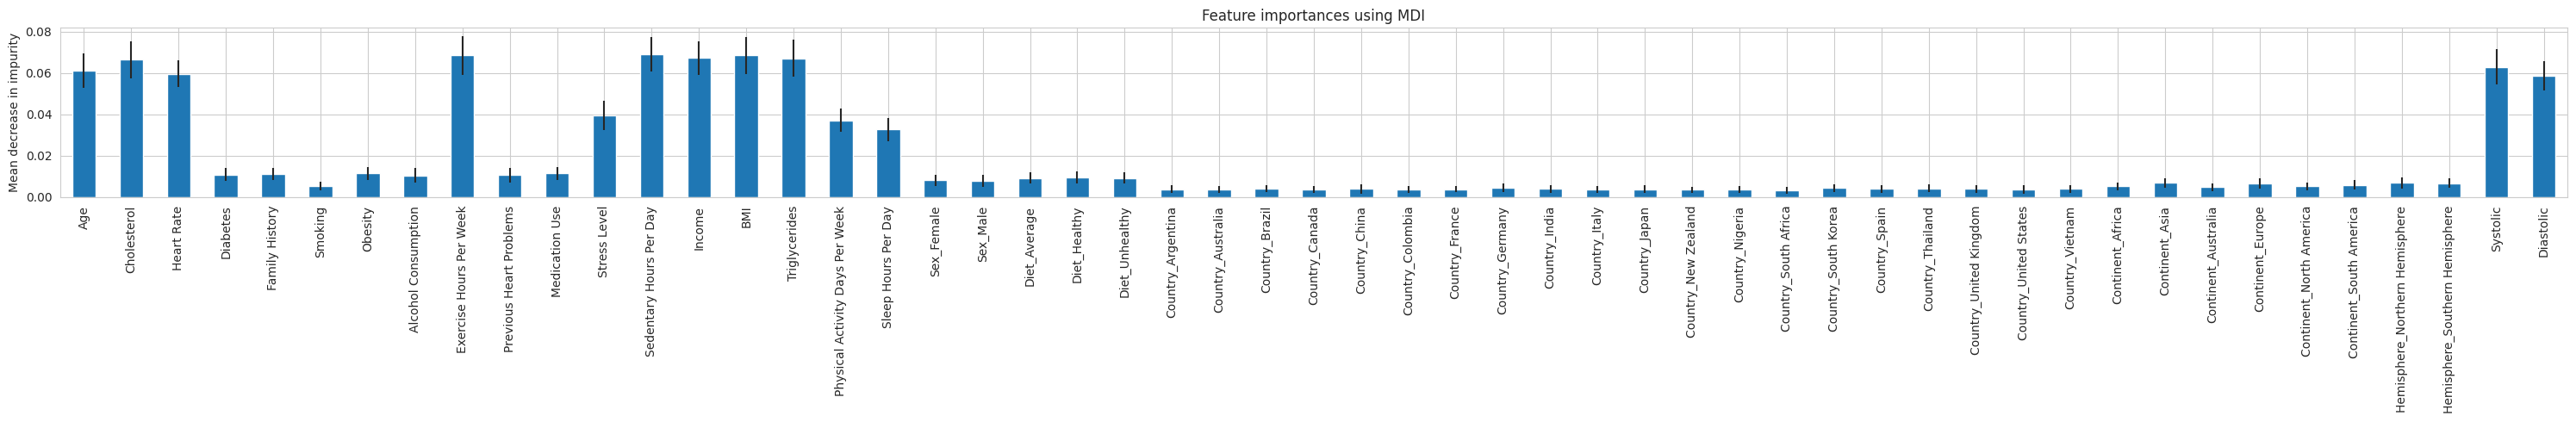

In [30]:
#feature importance study
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.rcParams["figure.figsize"]=(30,5)
fig.tight_layout()

In [22]:
#accuracy_of random_forest_model
score = forest.score(X_test, y_test)
print(score)

0.641259698767686


In [23]:
#confusion_metrics_for Random_Forest_classifier
from sklearn.metrics import confusion_matrix
y_true=y_test
y_predict= forest.predict(X_test)

confusion_matrix(y_true, y_predict)

array([[1384,   22],
       [ 764,   21]])

In [24]:
#implementation_of_logistic_regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)



LogisticRegression()

In [25]:
score1 = logisticRegr.score(X_test, y_test)
print(score1)

0.6417161113646737
